#### Malwina Wojewoda
# Regression: Nadaraya-Watson kernel regressionand Smoothing Splines regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import make_smoothing_spline
from sklearn.metrics import mean_squared_error

## Generate artificial data

In [6]:
def g(x):
    return 4.26 * (np.exp(-x) - 4 * np.exp(-2 * x) + 3 * np.exp(-3 * x))

def generate_data(N = 1000):
    x = np.random.uniform(0, 4, N)
    epsilon = np.random.normal(0, 0.1, N)
    y = g(x) + epsilon
    return x, y

In [7]:
x, y = generate_data()

## Implementation of Nadaraya-Watson kernel regression

In [8]:
def kernel(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)


def nadaraya_watson(x0, x, y, h):
    weights = kernel((x - x0) / h) / h
    numerator = np.sum(weights * y)
    denumerator = np.sum(weights)
    return numerator / denumerator

## Compare the performance of the Nadaraya-Watson kernel regression and Smoothing Splines regression

In [72]:
x0 = np.linspace(0, 4, 1000)

In [73]:
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_sorted = y[sort_indices]

In [74]:
h = 0.05
y_pred_nw = [nadaraya_watson(xi, x, y, h) for xi in x0]
spline = make_smoothing_spline(x_sorted, y_sorted)
y_pred_spline = spline(x0)

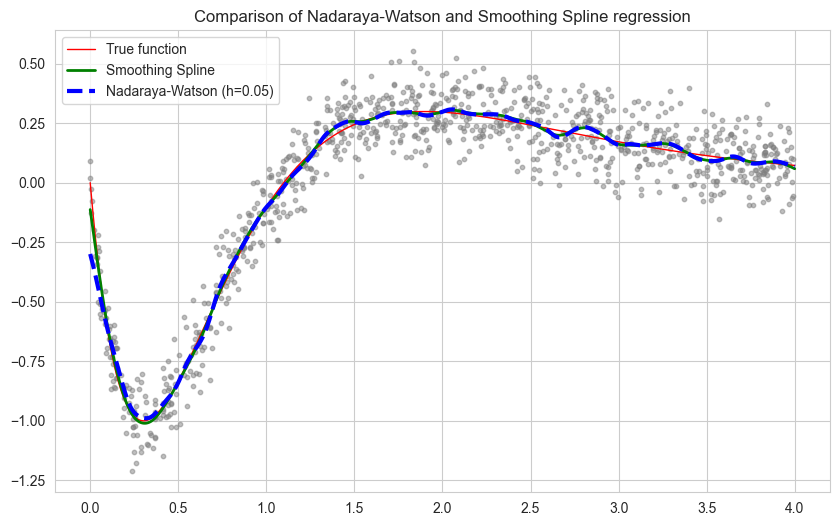

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.5, color='gray')
plt.plot(x0, g(x0), label="True function", color = 'red', linewidth = 1)
plt.plot(x0, y_pred_spline, label="Smoothing Spline", color= 'green', linewidth = 2)
plt.plot(x0, y_pred_nw, label="Nadaraya-Watson (h=0.05)", color = 'blue', linewidth = 3, linestyle = '--')
plt.title("Comparison of Nadaraya-Watson and Smoothing Spline regression")
plt.legend()
plt.savefig('PLOT1.pdf')
plt.show()

### Comparison of MSE

In [76]:
mse_nw = mean_squared_error(g(x0), y_pred_nw)
mse_spline = mean_squared_error(g(x0), y_pred_spline)
print(f"Nadaraya-Watson MSE: {mse_nw}")
print(f"Smoothing Spline MSE: {mse_spline}")

Nadaraya-Watson MSE: 0.0007898376500761584
Smoothing Spline MSE: 0.00022361285600966862


MSE for Smoothing Spline is lower than for Nadaraya-Watson, however for both methods is almost 0.

## Exploration how MSE depends on the bandwidth parameter h

In [58]:
h_values = np.linspace(0.01, 1, 100)
mse_values = []
for h in h_values:
    y_pred_nw = [nadaraya_watson(xi, x, y, h) for xi in x0]
    mse = mean_squared_error(g(x0), y_pred_nw)
    mse_values.append(mse)

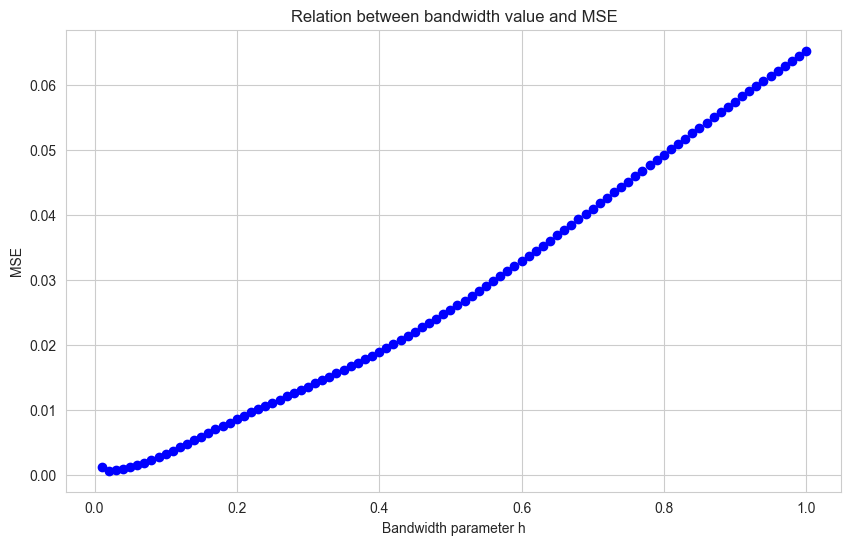

In [59]:
plt.figure(figsize=(10, 6))
for i in range(len(h_values)):
    plt.plot(h_values[i], mse_values[i], marker='o', color = 'blue')
plt.xlabel('Bandwidth parameter h')
plt.ylabel('MSE')
plt.title('Relation between bandwidth value and MSE')
plt.show()

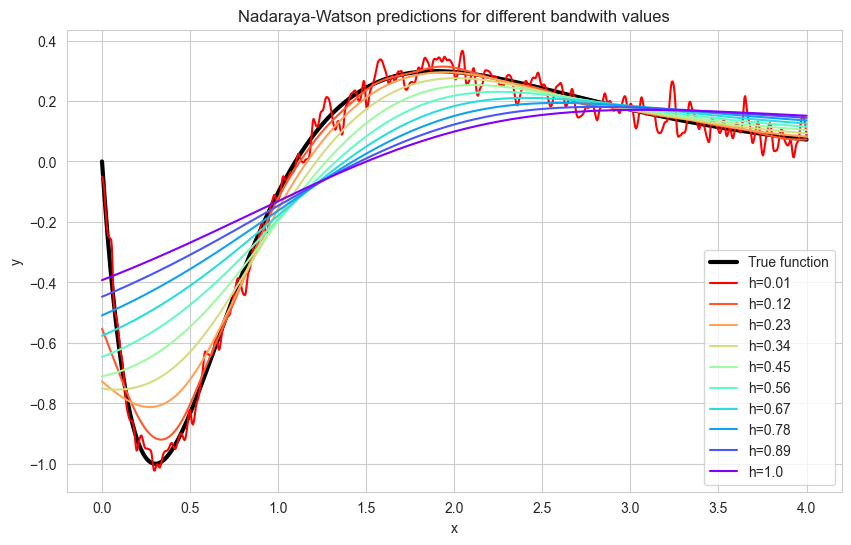

In [84]:
h_values = np.linspace(0.01, 1, 10)
predictions = []
for h in h_values:
    y_pred_nw = [nadaraya_watson(xi, x, y, h) for xi in x0]
    predictions.append(y_pred_nw)

colors = cm.rainbow(np.linspace(0, 1, len(h_values)))
plt.figure(figsize=(10, 6))
plt.plot(x0, g(x0), label="True function", color = 'black', linewidth = 3)
for i in range(len(predictions)):
    plt.plot(x0, predictions[i], color=colors[-i-1], label=f"h={h_values[i]}")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Nadaraya-Watson predictions for different bandwith values')
plt.show()


## Exploratiom how the MSE depends on sample size n

For better generalizatio I performed 20 iterations for each sample size n and calculated the mean and standard deviation of the MSE values.

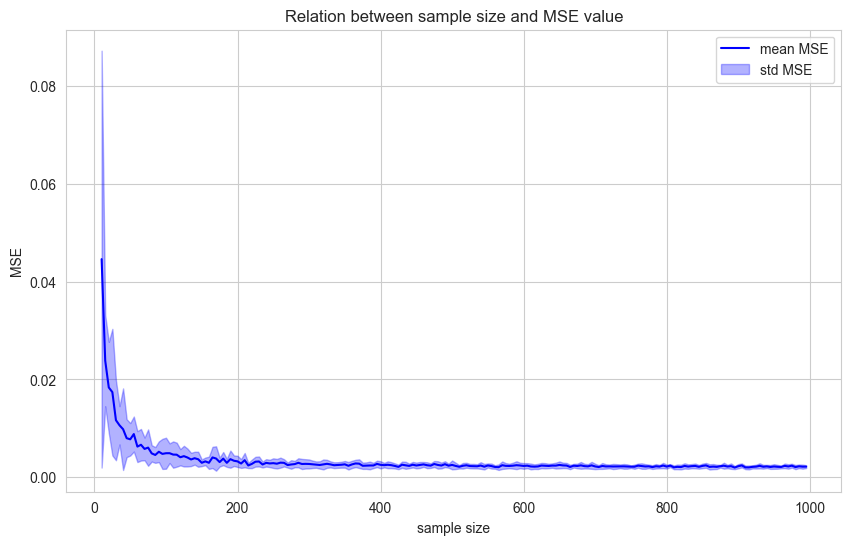

In [80]:
h = 0.1
n_values = np.arange(10, 1000, 5) 
num_iterations = 20
mse_values = np.zeros((num_iterations, len(n_values)))

for i in range(num_iterations):
    for j, n in enumerate(n_values):
        x, y = generate_data(n)
        x0 = np.linspace(0, 4, 1000)
        y_pred_nw = [nadaraya_watson(xi, x, y, h) for xi in x0]
        mse_values[i, j] = mean_squared_error(g(x0), y_pred_nw)

mean_mse = np.mean(mse_values, axis=0)
std_mse = np.std(mse_values, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(n_values, mean_mse, label='mean MSE', color='blue')
plt.fill_between(n_values, mean_mse - std_mse, mean_mse + std_mse, color='blue', alpha=0.3, label='std MSE')
plt.xlabel('sample size')
plt.ylabel('MSE')
plt.title('Relation between sample size and MSE value')
plt.grid(True)
plt.legend()
plt.savefig('PLOT2.pdf')
plt.show()